In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the data from the csv**


In [3]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/apartmentsPortugal.csv")
df

,Unnamed: 0,Titles,Price,Location,Rooms,Areas,Bathrooms,Listing Type
0,0,Apartamento T3 no Centro da cidade com vista,475 000 €,"Almada, Cova da Piedade, Pragal e Cacilhas, Al...",T3,142 m²,2,Usado
1,1,Apartamento T2 para venda,295 000 €,"Oeiras e São Julião da Barra, Paço de Arcos e ...",T2,73 m²,1,NaN
2,2,Apartamento T1 para venda,225 000 €,"Oeiras e São Julião da Barra, Paço de Arcos e ...",T1,43 m²,NaN,NaN
3,3,Apartamento T3,145 000 €,"Peniche, Leiria",T3,92 m²,2,NaN
4,4,Apartamento T3- Peniche,182 500 €,"Peniche, Leiria",T3,120 m²,2,Usado
...,...,...,...,...,...,...,...,...
86469,86469,"Apartamentos T4 PentHouse NOVOS - Requinte, Mo...",Preço sob consulta,"Faro (Sé e São Pedro), Faro",T4,176 m²,4 ou mais,Em construção
86470,86470,Apartamento T1 para venda,155 000 €,"Sandim, Olival, Lever e Crestuma, Vila Nova de...",T1,61 m²,1,NaN
86471,86471,Apartamento T3 no Elements,740 000 €,"Carnaxide e Queijas, Oeiras, Lisboa",T3,"116,95 m²",1,Novo
86472,86472,T5 Recuado -Cabedelo -VNG,1 150 000 €,"Canidelo, Vila Nova de Gaia, Porto",T5,171 m²,4 ou mais,Em construção


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86474 entries, 0 to 86473
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    86474 non-null  int64 
 1   Titles        86474 non-null  object
 2   Price         86474 non-null  object
 3   Location      86474 non-null  object
 4   Rooms         86474 non-null  object
 5   Areas         86474 non-null  object
 6   Bathrooms     78272 non-null  object
 7   Listing Type  59565 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.3+ MB


**Data cleaning & manipulation**

In [5]:
#Separating the location to Neighborhood, city and state
location_split = df['Location'].str.rsplit(',', n=2, expand=True)
df['Neighborhood'] = location_split[0]
df['City'] = location_split[1]
df['State'] = location_split[2]

In [6]:
# Convert prices to float
df['Price'] = df['Price'].astype(str).str.replace('Preçosobconsulta', '').str.replace('€', '').str.replace(' ', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [7]:
#Convert the number of rooms to int
df['Rooms'] = df['Rooms'].str.extract('(\d+)', expand=False).astype(int)

In [8]:
#Convert the area to float
df['Areas'] = df['Areas'].str.replace(' ', '').str.replace('m²', '').str.replace(',', '.').astype(float)

In [9]:
#Convert the number of bathroom to integer
df['Bathrooms'] = df['Bathrooms'].fillna('0').replace('4 ou mais', '4').astype(int)

In [10]:
df = df[df['Areas'] <= 1000]
df = df[df['Price'] <= 20000000]
#df.drop(columns=["Unnamed: 0"], inplace=True)
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39152 entries, 0 to 86473
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    39152 non-null  int64  
 1   Titles        39152 non-null  object 
 2   Price         39152 non-null  float64
 3   Location      39152 non-null  object 
 4   Rooms         39152 non-null  int64  
 5   Areas         39152 non-null  float64
 6   Bathrooms     39152 non-null  int64  
 7   Listing Type  39152 non-null  object 
 8   Neighborhood  39152 non-null  object 
 9   City          39152 non-null  object 
 10  State         39152 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


**Data visualization**

Mean value:  352710.46270944015


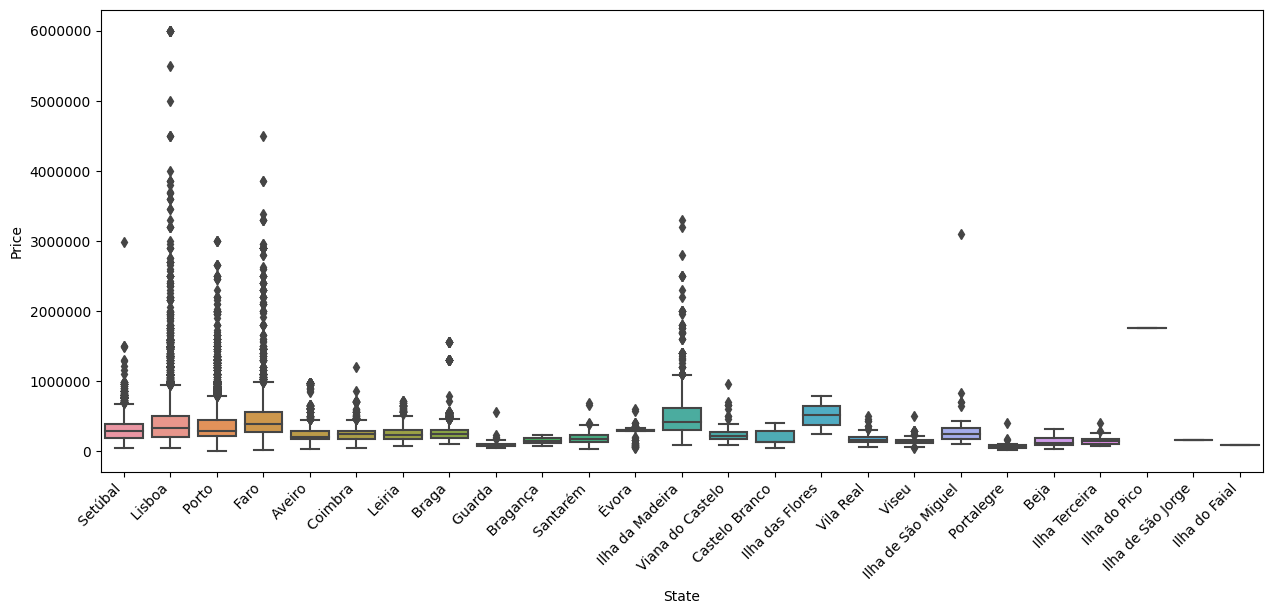

In [12]:
# Set the figure size
plt.figure(figsize=(15, 6))

sns.boxplot(data=df, x="State", y="Price")
plt.ticklabel_format(style='plain', axis='y')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

#Remove the scientific notation
plt.ticklabel_format(style='plain', axis='y')

print("Mean value: ", df['Price'].mean())

<Axes: xlabel='Rooms', ylabel='count'>

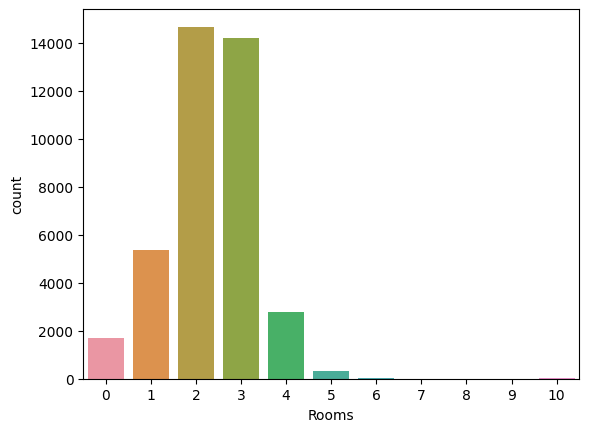

In [13]:
sns.countplot(data=df, x="Rooms")

<Axes: xlabel='Bathrooms', ylabel='count'>

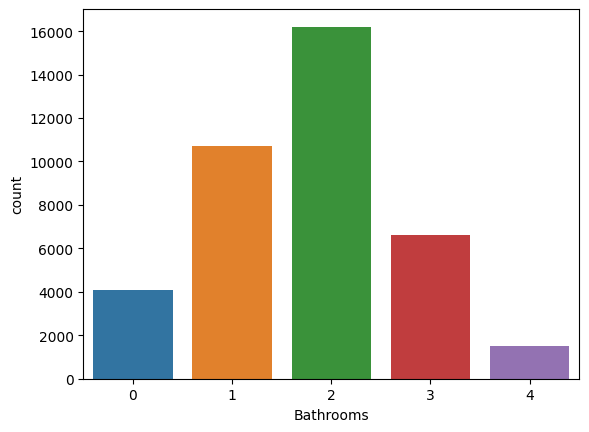

In [14]:
sns.countplot(data=df, x="Bathrooms")

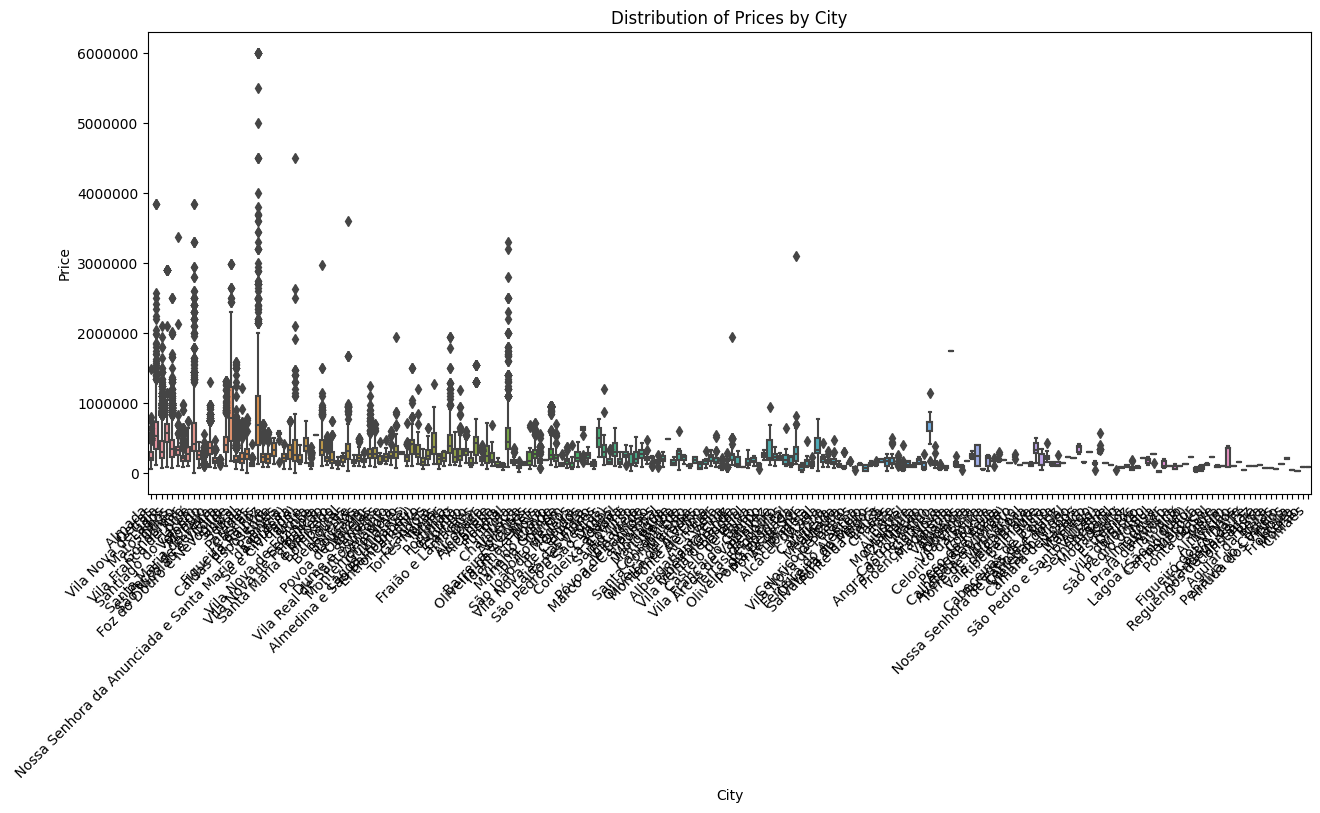

In [15]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Create the boxplot
sns.boxplot(data=df, x="City", y="Price")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

#Remove the scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Set the axis labels and title
plt.xlabel("City")
plt.ylabel("Price")
plt.title("Distribution of Prices by City")

# Show the plot
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

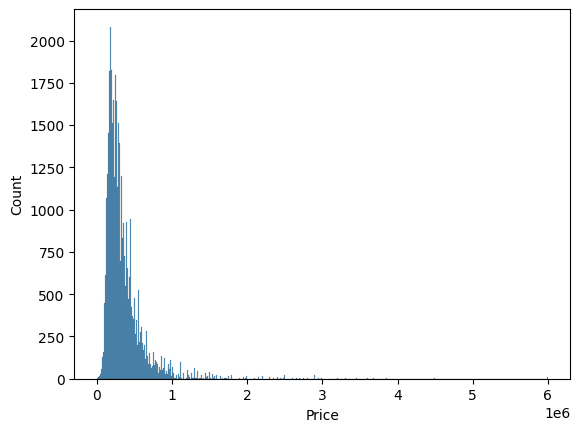

In [16]:
sns.histplot(data=df, x="Price")


<Axes: xlabel='Listing Type', ylabel='count'>

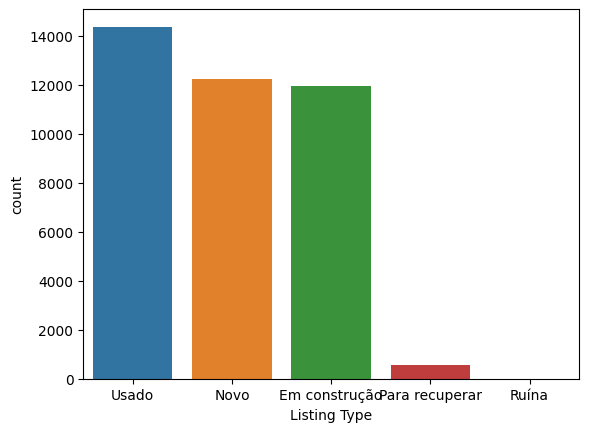

In [17]:
sns.countplot(data=df, x="Listing Type")

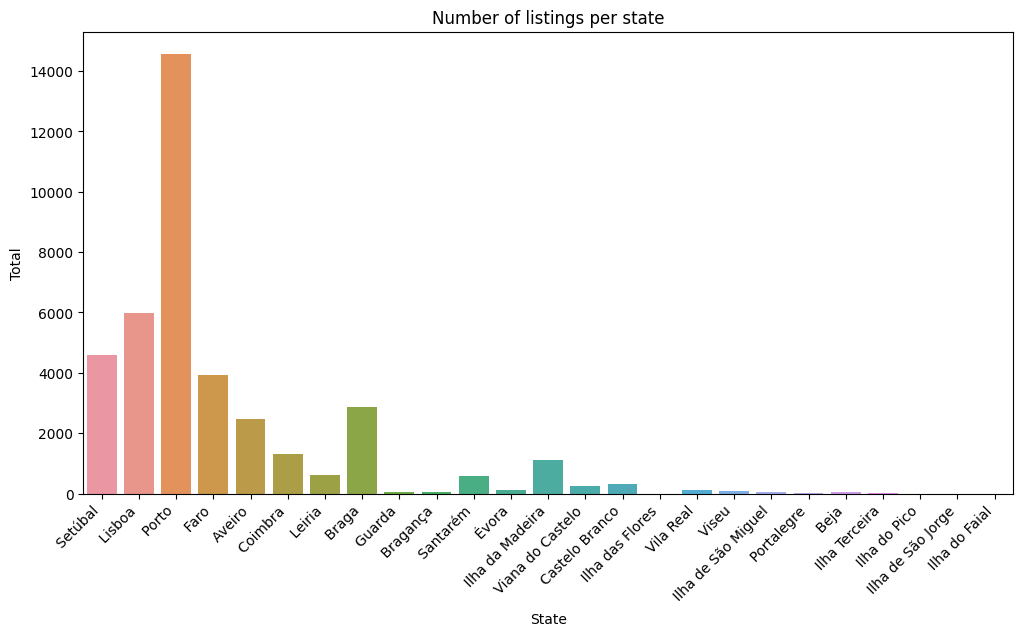

In [18]:
# Set the figure size
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="State")
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

#Remove the scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Set the axis labels and title
plt.xlabel("State")
plt.ylabel("Total")
plt.title("Number of listings per state")

# Show the plot
plt.show()


<Axes: xlabel='Areas', ylabel='Price'>

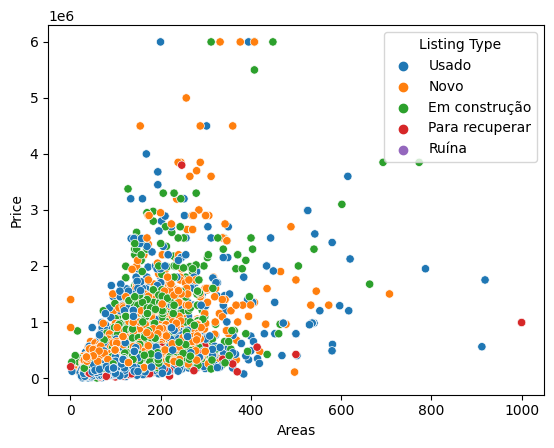

In [19]:
sns.scatterplot(data=df, x="Areas", y="Price", hue="Listing Type")

<Axes: xlabel='Rooms', ylabel='Price'>

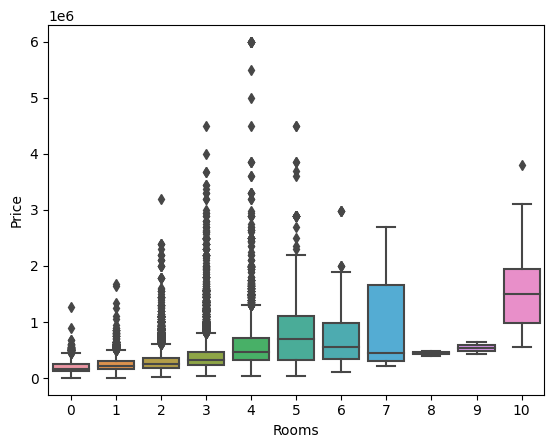

In [20]:
sns.boxplot(data=df, x="Rooms", y="Price")

**Creating the dummys**

In [21]:
df

,Unnamed: 0,Titles,Price,Location,Rooms,Areas,Bathrooms,Listing Type,Neighborhood,City,State
0,0,Apartamento T3 no Centro da cidade com vista,475000.0,"Almada, Cova da Piedade, Pragal e Cacilhas, Al...",3,142.00,2,Usado,"Almada, Cova da Piedade, Pragal e Cacilhas",Almada,Setúbal
16,16,Apartamento T3 no Elements,740000.0,"Carnaxide e Queijas, Oeiras, Lisboa",3,116.95,1,Novo,Carnaxide e Queijas,Oeiras,Lisboa
17,17,T5 Recuado -Cabedelo -VNG,1150000.0,"Canidelo, Vila Nova de Gaia, Porto",5,171.00,4,Em construção,Canidelo,Vila Nova de Gaia,Porto
18,18,Apartamento T2 novo em Lagos,500000.0,"São Gonçalo de Lagos, Lagos, Faro",2,99.40,2,Novo,São Gonçalo de Lagos,Lagos,Faro
19,19,Fantástico T2 À Praia Do Cabedelo,399000.0,"Canidelo, Vila Nova de Gaia, Porto",2,113.00,2,Em construção,Canidelo,Vila Nova de Gaia,Porto
...,...,...,...,...,...,...,...,...,...,...,...
86452,86452,Apartamento T3 no Centro da cidade com vista,475000.0,"Almada, Cova da Piedade, Pragal e Cacilhas, Al...",3,142.00,2,Usado,"Almada, Cova da Piedade, Pragal e Cacilhas",Almada,Setúbal
86453,86453,T2+1 | Fajozes | Vila do Conde,178000.0,"Fajozes, Vila do Conde, Porto",2,96.00,2,Usado,Fajozes,Vila do Conde,Porto
86471,86471,Apartamento T3 no Elements,740000.0,"Carnaxide e Queijas, Oeiras, Lisboa",3,116.95,1,Novo,Carnaxide e Queijas,Oeiras,Lisboa
86472,86472,T5 Recuado -Cabedelo -VNG,1150000.0,"Canidelo, Vila Nova de Gaia, Porto",5,171.00,4,Em construção,Canidelo,Vila Nova de Gaia,Porto


In [22]:
from sklearn.preprocessing import LabelEncoder

# One-hot encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=['Listing Type'])

# Label encoding using LabelEncoder
le = LabelEncoder()
df_encoded['Neighborhood_Encoded'] = le.fit_transform(df['Neighborhood'])
df_encoded['City_Encoded'] = le.fit_transform(df['City'])
df_encoded['State_Encoded'] = le.fit_transform(df['State'])

# Dropping the original categorical columns
df_encoded.drop(['Neighborhood', 'City', 'State'], axis=1, inplace=True)
df_encoded.dropna(inplace=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39152 entries, 0 to 86473
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   39152 non-null  int64  
 1   Titles                       39152 non-null  object 
 2   Price                        39152 non-null  float64
 3   Location                     39152 non-null  object 
 4   Rooms                        39152 non-null  int64  
 5   Areas                        39152 non-null  float64
 6   Bathrooms                    39152 non-null  int64  
 7   Listing Type_Em construção   39152 non-null  uint8  
 8   Listing Type_Novo            39152 non-null  uint8  
 9   Listing Type_Para recuperar  39152 non-null  uint8  
 10  Listing Type_Ruína           39152 non-null  uint8  
 11  Listing Type_Usado           39152 non-null  uint8  
 12  Neighborhood_Encoded         39152 non-null  int64  
 13  City_Encoded    

In [23]:
df_encoded.head(10)


,Unnamed: 0,Titles,Price,Location,Rooms,Areas,Bathrooms,Listing Type_Em construção,Listing Type_Novo,Listing Type_Para recuperar,Listing Type_Ruína,Listing Type_Usado,Neighborhood_Encoded,City_Encoded,State_Encoded
0,0,Apartamento T3 no Centro da cidade com vista,475000.0,"Almada, Cova da Piedade, Pragal e Cacilhas, Al...",3,142.00,2,0,0,0,0,1,35,13,20
16,16,Apartamento T3 no Elements,740000.0,"Carnaxide e Queijas, Oeiras, Lisboa",3,116.95,1,0,1,0,0,0,164,126,16
17,17,T5 Recuado -Cabedelo -VNG,1150000.0,"Canidelo, Vila Nova de Gaia, Porto",5,171.00,4,1,0,0,0,0,156,205,18
18,18,Apartamento T2 novo em Lagos,500000.0,"São Gonçalo de Lagos, Lagos, Faro",2,99.40,2,0,1,0,0,0,614,87,6
19,19,Fantástico T2 À Praia Do Cabedelo,399000.0,"Canidelo, Vila Nova de Gaia, Porto",2,113.00,2,1,0,0,0,0,156,205,18
21,21,Apartamento T3 novo em Lagos,575000.0,"São Gonçalo de Lagos, Lagos, Faro",3,129.05,2,0,1,0,0,0,614,87,6
23,23,T2 Piso 1,435000.0,"Matosinhos e Leça da Palmeira, Matosinhos, Porto",2,101.45,2,1,0,0,0,0,360,102,18
24,24,T4 inserido no Ocean Living – Rooftop com Vist...,860500.0,"Canidelo, Vila Nova de Gaia, Porto",4,170.00,3,1,0,0,0,0,156,205,18
25,25,Apartamento T3 inserido no Ocean Living - Vara...,625000.0,"Canidelo, Vila Nova de Gaia, Porto",3,154.00,3,1,0,0,0,0,156,205,18
26,26,"Apartamento T3 Em Canidelo, Vila Nova De Gaia",980000.0,"Canidelo, Vila Nova de Gaia, Porto",3,134.00,3,1,0,0,0,0,156,205,18


In [24]:
df_encoded.describe()

,Unnamed: 0,Price,Rooms,Areas,Bathrooms,Listing Type_Em construção,Listing Type_Novo,Listing Type_Para recuperar,Listing Type_Ruína,Listing Type_Usado,Neighborhood_Encoded,City_Encoded,State_Encoded
count,39152.000000,3.915200e+04,39152.000000,39152.000000,39152.000000,39152.000000,39152.000000,39152.000000,39152.000000,39152.000000,39152.000000,39152.000000,39152.000000
mean,42589.891781,3.527105e+05,2.315999,108.940769,1.763435,0.305374,0.312474,0.014712,0.000153,0.367286,337.146148,124.539896,13.575475
std,24833.208679,2.991279e+05,0.992944,49.799879,0.980030,0.460572,0.463508,0.120399,0.012379,0.482072,206.307980,61.574485,6.771854
min,0.000000,7.500000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21068.750000,1.900000e+05,2.000000,77.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,79.000000,6.000000
50%,42317.500000,2.750000e+05,2.000000,102.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,349.000000,113.000000,18.000000
75%,63656.000000,4.150000e+05,3.000000,132.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,501.000000,178.000000,18.000000
max,86473.000000,6.000000e+06,10.000000,1000.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,732.000000,217.000000,24.000000


**Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
features = ["Rooms", "Areas", "Bathrooms", "Listing Type_Em construção", "Listing Type_Novo", "Listing Type_Para recuperar", "Listing Type_Usado", "Neighborhood_Encoded", "City_Encoded", "State_Encoded"]
X = df_encoded[features]
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

**Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**Predictions and evaluation**

In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

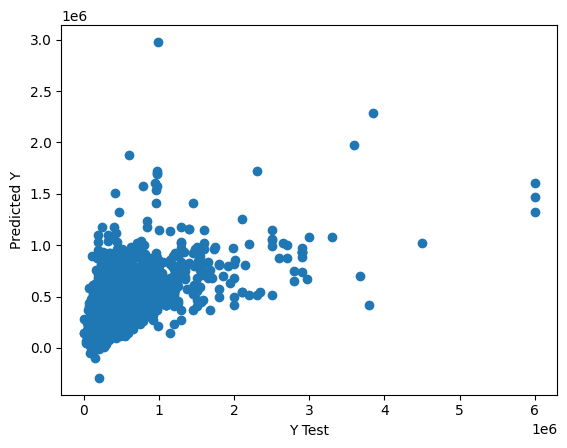

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# Evaluate the model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 136419.17119081147
MSE: 59088258280.99341
RMSE: 243080.7649341951


**Model 2- Decision Tree  **





In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction and evaluation of Model 2**

In [ ]:
predictions2 = dtree.predict(X_test)


Text(0, 0.5, 'Predicted Y')

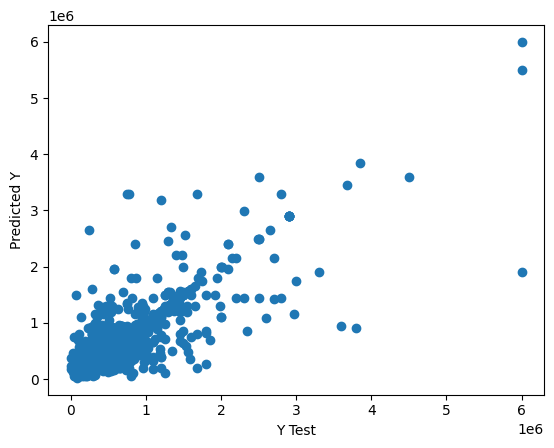

In [ ]:
plt.scatter(y_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 60193.48282467118
MSE: 26826817645.237133
RMSE: 163788.94237779648


**Model 3 - Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
predictions3 = rfc.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

**Model 4 - Normalizing data**

In [ ]:
df.head(5)

,Unnamed: 0,Titles,Price,Location,Rooms,Areas,Bathrooms,Listing Type,Neighborhood,City,State
0,0,Apartamento T3 no Centro da cidade com vista,475000.0,"Almada, Cova da Piedade, Pragal e Cacilhas, Al...",3,142.00,2,Usado,"Almada, Cova da Piedade, Pragal e Cacilhas",Almada,Setúbal
16,16,Apartamento T3 no Elements,740000.0,"Carnaxide e Queijas, Oeiras, Lisboa",3,116.95,1,Novo,Carnaxide e Queijas,Oeiras,Lisboa
17,17,T5 Recuado -Cabedelo -VNG,1150000.0,"Canidelo, Vila Nova de Gaia, Porto",5,171.00,4,Em construção,Canidelo,Vila Nova de Gaia,Porto
18,18,Apartamento T2 novo em Lagos,500000.0,"São Gonçalo de Lagos, Lagos, Faro",2,99.40,2,Novo,São Gonçalo de Lagos,Lagos,Faro
19,19,Fantástico T2 À Praia Do Cabedelo,399000.0,"Canidelo, Vila Nova de Gaia, Porto",2,113.00,2,Em construção,Canidelo,Vila Nova de Gaia,Porto


In [ ]:
relevant_cols = ['Price', 'Rooms', 'Areas', 'Bathrooms', 'Listing Type', 'Neighborhood', 'City', 'State']
df = df[relevant_cols]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Assuming 'df' is your cleaned dataframe containing the relevant columns

# Select categorical variables and encode them using one-hot encoding
categorical_cols = ['Listing Type', 'Neighborhood', 'City', 'State']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Select numerical features for normalization
numerical_cols = ['Rooms', 'Areas', 'Bathrooms']

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Split the dataset into X (features) and y (target variable)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

In [ ]:
df_encoded

,Price,Rooms,Areas,Bathrooms,Listing Type_Em construção,Listing Type_Novo,Listing Type_Para recuperar,Listing Type_Ruína,Listing Type_Usado,Neighborhood_A dos Cunhados e Maceira,...,State_ Leiria,State_ Lisboa,State_ Portalegre,State_ Porto,State_ Santarém,State_ Setúbal,State_ Viana do Castelo,State_ Vila Real,State_ Viseu,State_ Évora
0,475000.0,0.3,0.141141,0.50,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
16,740000.0,0.3,0.116066,0.25,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17,1150000.0,0.5,0.170170,1.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18,500000.0,0.2,0.098498,0.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,399000.0,0.2,0.112112,0.50,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86452,475000.0,0.3,0.141141,0.50,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
86453,178000.0,0.2,0.095095,0.50,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
86471,740000.0,0.3,0.116066,0.25,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
86472,1150000.0,0.5,0.170170,1.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

# Assuming you have already trained the linear regression model and have X_test, y_test

# Make predictions using the trained model
predictions4 = dtree.predict(X_test)

# Calculate MAE
mae = metrics.mean_absolute_error(y_test, predictions4)

# Calculate MSE
mse = metrics.mean_squared_error(y_test, predictions4)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Error (MAE): 56988.20143027414
Mean Squared Error (MSE): 26813855902.13962
Root Mean Squared Error (RMSE): 163749.36916562342


Text(0, 0.5, 'Predicted Y')

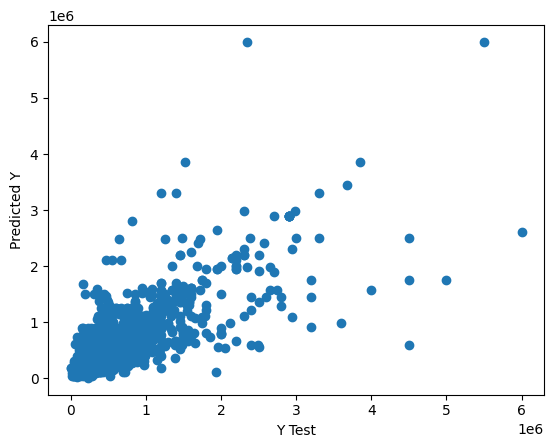

In [ ]:
plt.scatter(y_test,predictions4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')